## What would have happened in Syria after 2007...?

Through all the known history of our world, many events have changed the long thread of history. But, as history is past events, and not yet has been revealed a way to travel to the past, people like to dream and play about what would have happened if...that asteroid never crashed to the earth when the dinosaurs...or if Figo had never moved from Barcelona to Real Madrid.

Well, let's play sci-fi with our new friend Data Science and its applications. But let's also move to a more serious issue that is very close to our present life, and that involves millions of people: the Civil War in Syria. 

The aim of this is to, from a new point of view and using new tecniques, point out how military conflicts cut countries and people lifes.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from vega_datasets import data

In [3]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Comparison

We will be using two countries with similarities with Syria at the moment the conflict start, around 2007. 

By then Morocco was in the 196º place and had HDI of 0,594; and Bolivia in the 188º with a HDI of 0,631.


In [4]:
df_syria = pd.read_excel("Syrian_Dataset_WB.xls")
df_bolivia = pd.read_excel("Bolivia_Dataset_WB.xls")
df_morocco = pd.read_excel("Morocco_Dataset_WB.xls")

Dataset has already been manipulated, as World Bank datasets come with more than 3000 indicators. Those that appear in our dataset are selected in order to make this exercise easier and by importance in the development of the countries.

In [5]:
df_syria.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,1.800000e+01,1.500000e+01,1.600000e+01,1.500000e+01,1.600000e+01,1.800000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,2.100000e+01,2.100000e+01,2.100000e+01,1.900000e+01,1.900000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,1.300000e+01
mean,8.978037e+07,1.106894e+08,2.101938e+08,1.898860e+08,2.230088e+08,2.175903e+08,2.316700e+08,2.629047e+08,3.078102e+08,3.843170e+08,...,4.394665e+09,5.106155e+09,5.441138e+09,6.597543e+09,2.541315e+08,2.690382e+08,2.466338e+08,2.809929e+08,2.792999e+08,5.876224e+06
std,2.149345e+08,2.516398e+08,4.013533e+08,4.080557e+08,4.470873e+08,4.741518e+08,4.646664e+08,5.369232e+08,6.009625e+08,7.647946e+08,...,1.892400e+10,2.211305e+10,2.373482e+10,2.755570e+10,1.088112e+09,1.121979e+09,1.056188e+09,1.103624e+09,1.097278e+09,6.346280e+06
min,0.000000e+00,3.955381e+00,3.891089e+00,3.812383e+00,3.729528e+00,0.000000e+00,3.590369e+00,3.531009e+00,3.468916e+00,3.402466e+00,...,1.528000e+00,1.455000e+00,1.500000e+00,3.570338e+00,1.500000e+00,3.774571e+00,1.546000e+00,4.040243e+00,4.178877e+00,4.343885e+00
25%,4.723897e+01,1.559090e+03,2.417012e+03,1.832896e+03,3.289156e+03,5.019077e+01,3.702032e+03,3.471192e+03,4.486221e+03,5.446251e+03,...,7.364800e+01,7.293900e+01,7.210800e+01,2.938259e+04,9.637745e+02,1.050249e+04,9.634085e+02,1.344398e+04,1.360533e+04,1.756400e+04
50%,9.330735e+05,2.216521e+06,2.342858e+06,2.418626e+06,2.503194e+06,2.358900e+06,2.676932e+06,2.769002e+06,2.864975e+06,2.965084e+06,...,6.952000e+05,7.166960e+05,7.291960e+05,1.433767e+06,7.492900e+05,6.118210e+05,5.011940e+05,2.790150e+06,2.897897e+06,4.758732e+06
75%,4.152669e+06,8.553823e+07,2.342313e+08,1.191266e+08,2.321792e+08,1.894696e+08,2.549102e+08,2.623495e+08,3.183555e+08,4.098332e+08,...,9.171856e+06,1.002186e+07,1.168647e+07,1.190896e+07,1.021035e+07,1.015506e+07,9.601545e+06,1.004065e+07,9.996774e+06,9.774379e+06
max,8.577044e+08,9.452450e+08,1.213946e+09,1.200447e+09,1.339494e+09,1.475795e+09,1.411161e+09,1.604443e+09,1.763037e+09,2.271559e+09,...,8.682700e+10,1.014640e+11,1.089070e+11,1.202910e+11,4.747401e+09,4.764676e+09,4.608078e+09,4.419521e+09,4.394035e+09,1.826987e+07


Not very helpful, let's see what indicadors do we have

In [6]:
pd.set_option("display.max_columns",1000)

In [7]:
df_syria.tail(15)

,Country Name,Country Code,Indicator Name,Indicator Code,VlookUp,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
10,Syrian Arab Republic,SYR,"Air transport, passengers carried",IS.AIR.PSGR,IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.390000e+05,1.453000e+05,2.357000e+05,1.847000e+05,2.843000e+05,3.707000e+05,4.482000e+05,4.106000e+05,4.947000e+05,4.332000e+05,4.650000e+05,5.155000e+05,4.664000e+05,4.866000e+05,4.644000e+05,4.758000e+05,4.586000e+05,3.906000e+05,3.416000e+05,4.562000e+05,6.133000e+05,6.612000e+05,5.519000e+05,4.850000e+05,4.721000e+05,5.631000e+05,5.985000e+05,6.942000e+05,6.854000e+05,6.684000e+05,7.501290e+05,7.609230e+05,9.268500e+05,9.078500e+05,1.169646e+06,1.239825e+06,1.252102e+06,1.371450e+06,1.358473e+06,1.342518e+06,1.158366e+06,1.433767e+06,9.079277e+05,4.759320e+05,4.759320e+05,1.790200e+04,1.811700e+04,1.756400e+04
11,Syrian Arab Republic,SYR,Urban population,SP.URB.TOTL,SP.URB.TOTL,1.683373e+06,1.765942e+06,1.854806e+06,1.948106e+06,2.046280e+06,2.149577e+06,2.258339e+06,2.372750e+06,2.493121e+06,2.619593e+06,2.752642e+06,2.874816e+06,2.997366e+06,3.125158e+06,3.257984e+06,3.395668e+06,3.537997e+06,3.685168e+06,3.838754e+06,4.000336e+06,4.171386e+06,4.352356e+06,4.533108e+06,4.718567e+06,4.908137e+06,5.099736e+06,5.292945e+06,5.488087e+06,5.685507e+06,5.885955e+06,6.090036e+06,6.297270e+06,6.507431e+06,6.721723e+06,6.941927e+06,7.187665e+06,7.447436e+06,7.716370e+06,7.989892e+06,8.260780e+06,8.524943e+06,8.771436e+06,9.002248e+06,9.238624e+06,9.511772e+06,9.839208e+06,1.024170e+07,1.070204e+07,1.115359e+07,1.150305e+07,1.168647e+07,1.138757e+07,1.093631e+07,1.040554e+07,9.889591e+06,9.773668e+06,9.737730e+06,9.774379e+06
12,Syrian Arab Republic,SYR,Rural population,SP.RUR.TOTL,SP.RUR.TOTL,2.890139e+06,2.955954e+06,3.020616e+06,3.086540e+06,3.154056e+06,3.223560e+06,3.294907e+06,3.367960e+06,3.442739e+06,3.519455e+06,3.597899e+06,3.696041e+06,3.802775e+06,3.912693e+06,4.025193e+06,4.140046e+06,4.256665e+06,4.375481e+06,4.497664e+06,4.625354e+06,4.759388e+06,4.900495e+06,5.057119e+06,5.220280e+06,5.384912e+06,5.548896e+06,5.711327e+06,5.872765e+06,6.033564e+06,6.194489e+06,6.356135e+06,6.517949e+06,6.679654e+06,6.842444e+06,7.007770e+06,7.157827e+06,7.307850e+06,7.461086e+06,7.612318e+06,7.755312e+06,7.885905e+06,7.995463e+06,8.085653e+06,8.176642e+06,8.294866e+06,8.455403e+06,8.673274e+06,8.930767e+06,9.171856e+06,9.321847e+06,9.332362e+06,9.476426e+06,9.484395e+06,9.403597e+06,9.313499e+06,8.961319e+06,8.692723e+06,8.495489e+06
13,Syrian Arab Republic,SYR,"Population, total",SP.POP.TOTL,SP.POP.TOTL,4.573512e+06,4.721896e+06,4.875422e+06,5.034646e+06,5.200336e+06,5.373137e+06,5.553246e+06,5.740710e+06,5.935860e+06,6.139048e+06,6.350541e+06,6.570857e+06,6.800141e+06,7.037851e+06,7.283177e+06,7.535714e+06,7.794662e+06,8.060649e+06,8.336418e+06,8.625690e+06,8.930774e+06,9.252851e+06,9.590227e+06,9.938847e+06,1.029305e+07,1.064863e+07,1.100427e+07,1.136085e+07,1.171907e+07,1.208044e+07,1.244617e+07,1.281522e+07,1.318708e+07,1.356417e+07,1.394970e+07,1.434549e+07,1.475529e+07,1.517746e+07,1.560221e+07,1.601609e+07,1.641085e+07,1.676690e+07,1.708790e+07,1.741527e+07,1.780664e+07,1.829461e+07,1.891498e+07,1.963281e+07,2.032544e+07,2.082489e+07,2.101883e+07,2.086399e+07,2.042070e+07,1.980914e+07,1.920309e+07,1.873499e+07,1.843045e+07,1.826987e+07
14,Syrian Arab Republic,SYR,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,SP.POP.65UP.TO.ZS,3.996360e+00,3.955381e+00,3.891089e+00,3.812383e+00,3.729528e+00,3.646845e+00,3.590369e+00,3.531009e+00,3.468916e+00,3.402466e+00,3.331984e+00,3.295887e+00,3.253374e+00,3.206135e+00,3.156507e+00,3.105903e+00,3.079774e+00,3.051963e+00,3.023217e+00,2.993847e+00,2.964726e+00,2.947816e+00,2.929701e+00,2.913688e+00,2.9

There are some columns we are not going to need, let's drop them from all the countries.

In [8]:
df_syria= df_syria.drop(["Country Name", "Indicator Code", "VlookUp", "Country Code"],axis=1)
df_bolivia = df_bolivia.drop(["Country Name", "Indicator Code", "VlookUp", "Country Code"],axis=1)
df_morocco = df_morocco.drop(["Country Name", "Indicator Code", "VlookUp", "Country Code"],axis=1)

It would be also very useful for our exercise to have the years on the left and the indicators on top, for that we transpose, and get Indicator's name for the index.

In [9]:
df_syria.transpose()
df_bolivia.transpose()
df_morocco.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Indicator Name,"Physicians (per 1,000 people)","Hospital beds (per 1,000 people)",Fixed broadband subscriptions,Mobile cellular subscriptions,"Railways, passengers carried (million passenge...","Air transport, passengers carried",Military expenditure (current LCU),"Armed forces personnel, total",Urban population,Rural population,"Population, total",Population ages 65 and above (% of total),"Population ages 65 and above, total",Population ages 15-64 (% of total),"Population ages 15-64, total",Population ages 0-14 (% of total),"Population ages 0-14, total","Life expectancy at birth, total (years)","External debt stocks, total (DOD, current US$)","Labor force, total","GNI, Atlas method (current US$)",GDP (current US$),CO2 emissions (kt),Imports of goods and services (current US$),Exports of goods and services (current US$)
1960,0.106,1.5984,NaN,0,NaN,NaN,2.105e+08,NaN,3.61929e+06,8.70924e+06,1.23285e+07,2.98177,367608,52.3128,6.4494e+06,44.7055,5.51153e+06,48.458,NaN,NaN,NaN,2.03715e+09,3641.33,4.62405e+08,4.8019e+08
1961,NaN,NaN,NaN,NaN,NaN,NaN,2.443e+08,NaN,3.79397e+06,8.91658e+06,1.27105e+07,3.038,386147,51.557,6.55318e+06,45.405,5.77122e+06,48.88,NaN,NaN,NaN,2.02569e+09,3777.01,5.01927e+08,4.40668e+08
1962,NaN,NaN,NaN,NaN,NaN,NaN,2.725e+08,NaN,3.97362e+06,9.1212e+06,1.30948e+07,3.07907,403199,50.7314,6.64318e+06,46.1895,6.04844e+06,49.307,NaN,NaN,NaN,2.37961e+09,3080.28,5.01927e+08,4.28811e+08
1963,NaN,NaN,NaN,NaN,NaN,NaN,3.79e+08,NaN,4.1575e+06,9.32074e+06,1.34782e+07,3.11193,419433,49.9496,6.73232e+06,46.9385,6.32648e+06,49.738,NaN,NaN,NaN,2.65725e+09,3960.36,5.33544e+08,4.76238e+08
1964,NaN,NaN,NaN,NaN,NaN,NaN,3.542e+08,NaN,4.34463e+06,9.51251e+06,1.38571e+07,3.14645,436008,49.3707,6.84137e+06,47.4828,6.57976e+06,50.168,NaN,NaN,NaN,2.79834e+09,4422.4,5.3552e+08,5.45401e+08
1965,0.082,NaN,NaN,0,NaN,NaN,3.197e+08,NaN,4.53366e+06,9.69539e+06,1.4229e+07,3.18662,453425,49.0641,6.98135e+06,47.7493,6.79427e+06,50.593,NaN,NaN,NaN,2.94833e+09,4261.05,4.97975e+08,5.3552e+08
1966,NaN,NaN,NaN,NaN,NaN,NaN,3.438e+08,NaN,4.72487e+06,9.86842e+06,1.45933e+07,3.24741,473904,48.7199,7.10984e+06,48.0327,7.00954e+06,51.009,NaN,NaN,NaN,2.8764e+09,5467.5,5.57257e+08,5.45401e+08
1967,NaN,NaN,NaN,NaN,NaN,NaN,3.56e+08,NaN,4.91822e+06,1.00326e+07,1.49508e+07,3.3097,494826,48.5967,7.2656e+06,48.0936,7.19038e+06,51.413,NaN,NaN,NaN,3.04634e+09,5416.16,6.14564e+08,5.45401e+08
1968,NaN,NaN,NaN,NaN,NaN,NaN,4.6e+08,NaN,5.11409e+06,1.01889e+07,1.53029e+07,3.36842,515468,48.6436,7.4439e+06,47.988,7.34358e+06,51.808,NaN,NaN,3.45436e+09,3.27142e+09,5628.85,6.56062e+08,6.04683e+08


In [10]:
df_syria = df_syria.set_index('Indicator Name').T

In [11]:
df_morocco = df_morocco.set_index("Indicator Name").T

In [12]:
df_bolivia = df_bolivia.set_index('Indicator Name').T

It could be useful to get the index as column to filter. We will need to transfom that column into int or float to work with it as a number

In [13]:
df_syria['Year'] = df_syria.index
df_morocco['Year'] = df_morocco.index
df_bolivia['Year'] = df_bolivia.index

In [14]:
df_syria.dtypes

Indicator Name
Population ages 15-64 (% of total)                     float64
Population ages 15-64, total                           float64
Population ages 0-14 (% of total)                      float64
Population ages 0-14, total                            float64
External debt stocks, total (DOD, current US$)         float64
Physicians (per 1,000 people)                          float64
Hospital beds (per 1,000 people)                       float64
Fixed broadband subscriptions                          float64
Mobile cellular subscriptions                          float64
Railways, passengers carried (million passenger-km)    float64
Air transport, passengers carried                      float64
Urban population                                       float64
Rural population                                       float64
Population, total                                      float64
Population ages 65 and above (% of total)              float64
Population ages 65 and above, total     

In [15]:
df_syria['Year'] = df_syria.Year.astype(int)
df_morocco['Year'] = df_morocco.Year.astype(int)
df_bolivia['Year'] = df_bolivia.Year.astype(int)

In [16]:
df_syria.head()

Indicator Name,Population ages 15-64 (% of total),"Population ages 15-64, total",Population ages 0-14 (% of total),"Population ages 0-14, total","External debt stocks, total (DOD, current US$)","Physicians (per 1,000 people)","Hospital beds (per 1,000 people)",Fixed broadband subscriptions,Mobile cellular subscriptions,"Railways, passengers carried (million passenger-km)","Air transport, passengers carried",Urban population,Rural population,"Population, total",Population ages 65 and above (% of total),"Population ages 65 and above, total","Labor force, total","GNI, Atlas method (current US$)",GDP (current US$),CO2 emissions (kt),Imports of goods and services (current US$),Exports of goods and services (current US$),Military expenditure (current LCU),"Armed forces personnel, total","Life expectancy at birth, total (years)",Year
1960,49.527518,2265147.0,46.476122,2125591.0,NaN,0.216,1.076738,NaN,0.0,NaN,NaN,1683373.0,2890139.0,4573512.0,3.996360,182774.0,NaN,NaN,8.577044e+08,3223.293,2.384383e+08,1.831800e+08,323000000.0,NaN,51.971,1960
1961,49.103284,2318606.0,46.941335,2216521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1765942.0,2955954.0,4721896.0,3.955381,186769.0,NaN,NaN,9.452450e+08,3065.612,2.115720e+08,1.663546e+08,323000000.0,NaN,52.568,1961
1962,48.609023,2369895.0,47.499888,2315820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1854806.0,3020616.0,4875422.0,3.891089,189707.0,NaN,1.213946e+09,1.110566e+09,3204.958,2.394758e+08,2.324832e+08,552000000.0,NaN,53.176,1962
1963,48.147973,2424080.0,48.039644,2418626.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948106.0,3086540.0,5034646.0,3.812383,191940.0,NaN,1.145373e+09,1.200447e+09,3611.995,2.541440e+08,2.332186e+08,NaN,NaN,53.797,1963
1964,47.861484,2488958.0,48.408987,2517430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2046280.0,3154056.0,5200336.0,3.729528,193948.0,NaN,1.303940e+09,1.339494e+09,4367.397,2.572913e+08,2.238085e+08,428000000.0,NaN,54.435,1964


#### Let's have a look at the data of the countries during the 70s

In [17]:
df_syria_70s = df_syria[(df_syria['Year'] > 1969) & (df_syria['Year'] < 1980)]
df_morocco_70s = df_morocco[(df_morocco['Year'] > 1969) & (df_morocco['Year'] < 1980)]
df_bolivia_70s = df_bolivia[(df_bolivia['Year'] > 1969) & (df_bolivia['Year'] < 1980)]

In [18]:
df_syria_70s.head(10)

Indicator Name,Population ages 15-64 (% of total),"Population ages 15-64, total",Population ages 0-14 (% of total),"Population ages 0-14, total","External debt stocks, total (DOD, current US$)","Physicians (per 1,000 people)","Hospital beds (per 1,000 people)",Fixed broadband subscriptions,Mobile cellular subscriptions,"Railways, passengers carried (million passenger-km)","Air transport, passengers carried",Urban population,Rural population,"Population, total",Population ages 65 and above (% of total),"Population ages 65 and above, total","Labor force, total","GNI, Atlas method (current US$)",GDP (current US$),CO2 emissions (kt),Imports of goods and services (current US$),Exports of goods and services (current US$),Military expenditure (current LCU),"Armed forces personnel, total","Life expectancy at birth, total (years)",Year
1970,48.598915,3086294.0,48.069102,3052648.0,0.0,0.259,0.9934,NaN,0.0,NaN,139000.0,2752642.0,3597899.0,6350541.0,3.331984,211599.0,NaN,2.289285e+09,2.140384e+09,6659.272,4.595697e+08,3.828082e+08,7.630000e+08,NaN,58.814,1970
1971,48.625301,3195099.0,48.078812,3159190.0,0.0,NaN,NaN,NaN,NaN,NaN,145300.0,2874816.0,3696041.0,6570857.0,3.295887,216568.0,NaN,2.668035e+09,2.589852e+09,8885.141,5.898726e+08,4.591409e+08,6.760000e+08,NaN,59.600,1971
1972,48.613713,3305801.0,48.132914,3273106.0,0.0,NaN,NaN,NaN,NaN,NaN,235700.0,2997366.0,3802775.0,6800141.0,3.253374,221234.0,NaN,3.427787e+09,3.059682e+09,7766.706,7.393380e+08,5.672514e+08,9.940000e+08,NaN,60.378,1972
1973,48.580895,3419051.0,48.212970,3393157.0,0.0,NaN,NaN,NaN,NaN,NaN,184700.0,3125158.0,3912693.0,7037851.0,3.206135,225643.0,NaN,3.524257e+09,3.239488e+09,7895.051,8.511097e+08,7.302409e+08,1.486000e+09,NaN,61.137,1973
1974,48.560374,3536738.0,48.283119,3516545.0,0.0,NaN,NaN,NaN,NaN,NaN,284300.0,3257984.0,4025193.0,7283177.0,3.156507,229894.0,NaN,5.158600e+09,5.159557e+09,9666.212,1.775235e+09,1.269931e+09,2.006000e+09,NaN,61.872,1974
1975,48.566320,3659819.0,48.327776,3641843.0,0.0,0.256,1.0000,NaN,0.0,NaN,370700.0,3395668.0,4140046.0,7535714.0,3.105903,234052.0,NaN,7.285292e+09,6.826981e+09,11184.350,2.364286e+09,1.493538e+09,3.285000e+09,NaN,62.579,1975
1976,48.404100,3772936.0,48.516126,3781668.0,0.0,NaN,NaN,NaN,0.0,NaN,448200.0,3537997.0,4256665.0,7794662.0,3.079774,240058.0,NaN,8.485131e+09,7.633529e+09,13758.584,2.669065e+09,1.523378e+09,3.641000e+09,NaN,63.258,1976
1977,48.287898,3892318.0,48.660139,3922323.0,0.0,NaN,NaN,NaN,0.0,NaN,410600.0,3685168.0,4375481.0,8060649.0,3.051963,246008.0,NaN,8.454842e+09,7.696011e+09,14664.333,3.190648e+09,1.429055e+09,3.918000e+09,NaN,63.914,1977
1978,48.205272,4018593.0,48.771511,4065797.0,0.0,NaN,NaN,NaN,0.0,NaN,494700.0,3838754.0,4497664.0,8336418.0,3.023217,252028.0,NaN,9.760003e+09,9.275203e+09,15221.717,2.953073e+09,1.407154e+09,4.763000e+09,NaN,64.552,1978
1979,48.138734,4152298.0,48.867418,4215152.0,0.0,NaN,NaN,NaN,0.0,NaN,433200.0,4000336.0,4625354.0,8625690.0,2.993847,258240.0,NaN,1.107379e+10,9.929682e+09,22548.383,3.645326e+09,1.941933e+09,6.208000e+09,NaN,65.172,1979


In [19]:
## Tabla 
df_syria_70s["GDP (current US$)"].mean()
df_morocco_70s["GDP (current US$)"].mean()
df_bolivia_70s["GDP (current US$)"].mean()

2327729266.0213714

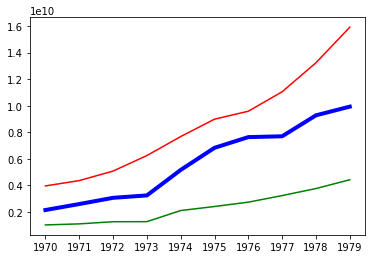

In [21]:
## Altair
plt.plot(df_syria_70s["GDP (current US$)"], c="b", linewidth=4,)
plt.plot(df_morocco_70s["GDP (current US$)"], c="r")
plt.plot(df_bolivia_70s["GDP (current US$)"], c="g")

In the 70s, Syria was between Morocco and Bolivia by GDP per Capita.

### Let's see how the conflict makes population sink in Syria.

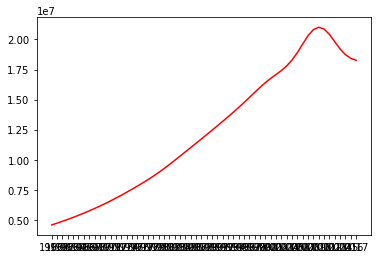

In [22]:
## Altair
plt.plot(df_syria["Population, total"], c="r")



Another interessant indicator to see how a countrie is developing are CO2 emissions. Let's see if this is also correlated with the conflict. 

** CO2 emissions have been oversized in order to get a more clear visualization.

We can also apreciated that Urban population has been more affected by the conflict.

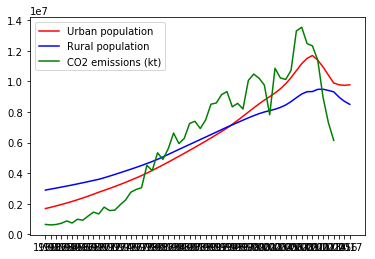

In [23]:
## Altair
plt.plot(df_syria["Urban population"], c="r")
plt.plot(df_syria["Rural population"], c="b")
plt.plot(df_syria["CO2 emissions (kt)"]*200, c="g")
plt.legend()
plt.show()

As in the other countries, urban population keeps growing as expected in the rest of the world, Syrian population starts to fall. This "expected for the rest of the world" is what we want to predict with this exercise.

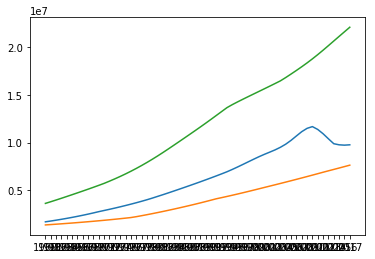

In [24]:
## Altair
plt.plot(df_syria["Urban population"])
plt.plot(df_bolivia["Urban population"])
plt.plot(df_morocco["Urban population"])

Wars do not make easy to bring data, and that is what happened for Syrian GDP per capita after the start of the war. We will try to full this lack of data using our latinamerican and african countries.

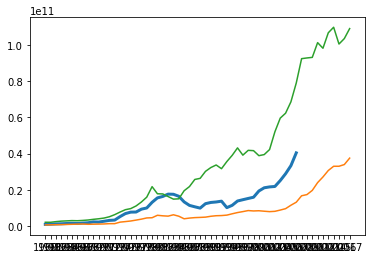

In [25]:
## Altair
plt.plot(df_syria["GDP (current US$)"], linewidth=3,)
plt.plot(df_bolivia["GDP (current US$)"])
plt.plot(df_morocco["GDP (current US$)"])

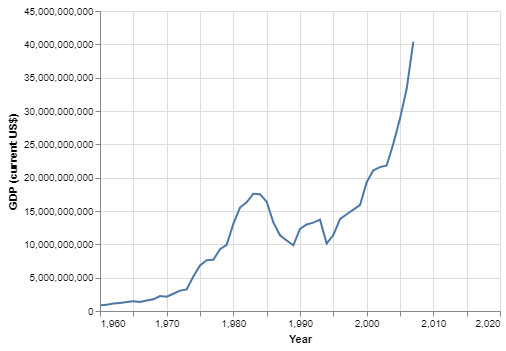

In [26]:
alt.Chart(df_syria).mark_line().encode(
 x="Year",
 y="GDP (current US$)",
)

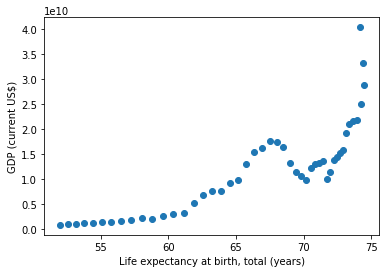

In [36]:
plt.scatter(df_syria["Life expectancy at birth, total (years)"],df_syria["GDP (current US$)"])
plt.xlabel("Life expectancy at birth, total (years)")
plt.ylabel("GDP (current US$)")
plt.show()

## Let's stop with chart lines and dive into the correlations that explain situation in Syria after the war.

In [27]:
df_syria_00 = df_syria[(df_syria["Year"] > 2006)]

In [28]:
df_syria_00.corr()

Indicator Name,Population ages 15-64 (% of total),"Population ages 15-64, total",Population ages 0-14 (% of total),"Population ages 0-14, total","External debt stocks, total (DOD, current US$)","Physicians (per 1,000 people)","Hospital beds (per 1,000 people)",Fixed broadband subscriptions,Mobile cellular subscriptions,"Railways, passengers carried (million passenger-km)","Air transport, passengers carried",Urban population,Rural population,"Population, total",Population ages 65 and above (% of total),"Population ages 65 and above, total","Labor force, total","GNI, Atlas method (current US$)",GDP (current US$),CO2 emissions (kt),Imports of goods and services (current US$),Exports of goods and services (current US$),Military expenditure (current LCU),"Armed forces personnel, total","Life expectancy at birth, total (years)",Year
Indicator Name,,,,,,,,,,,,,,,,,,,,,,,,,,
Population ages 15-64 (% of total),1.000000,0.829520,-0.864641,0.537541,0.337529,-0.638482,0.172715,-0.497619,-0.197748,-0.252183,0.643368,0.842789,0.367279,0.754725,-0.524804,-0.176987,0.749848,NaN,NaN,0.565066,NaN,NaN,0.787460,0.237023,0.458983,-0.459822
"Population ages 15-64, total",0.829520,1.000000,-0.474434,0.914282,0.333319,-0.717884,0.315404,-0.854647,-0.423775,-0.176453,0.865913,0.982211,0.770259,0.992412,-0.846728,-0.480952,0.966786,NaN,NaN,0.563090,NaN,NaN,0.840639,0.134929,0.478529,-0.733451
Population ages 0-14 (% of total),-0.864641,-0.474434,1.000000,-0.078830,-0.502933,0.565669,-0.168413,-0.000871,-0.239043,-0.001818,-0.194502,-0.472348,-0.035532,-0.366838,0.026121,-0.303630,-0.325844,NaN,NaN,-0.310340,NaN,NaN,-0.839304,-0.082482,-0.160186,-0.032459
"Population ages 0-14, total",0.537541,0.914282,-0.078830,1.000000,0.209748,-0.771410,0.569380,-0.961130,-0.568671,-0.236582,0.881943,0.889884,0.871012,0.956218,-0.936037,-0.662677,0.940262,NaN,NaN,0.670479,NaN,NaN,0.720705,0.097203,0.539073,-0.829273
"External debt stocks, total (DOD, current US$)",0.337529,0.333319,-0.502933,0.209748,1.000000,-0.319755,0.730042,0.080361,0.468474,0.454694,-0.092608,0.236081,0.464127,0.323596,0.121947,0.544276,0.154510,NaN,NaN,-0.201711,NaN,NaN,0.566832,-0.199393,-0.360626,0.291902
"Physicians (per 1,000 people)",-0.638482,-0.717884,0.565669,-0.771410,-0.319755,1.000000,0.140145,0.516193,0.078163,0.375003,-0.531273,-0.721255,-0.309869,-0.739414,0.508835,0.020399,-0.583658,NaN,NaN,-0.446762,NaN,NaN,-0.596209,-0.568618,-0.324939,0.337668
"Hospital beds (per 1,000 people)",0.172715,0.315404,-0.168413,0.569380,0.730042,0.140145,1.000000,-0.050876,-0.002665,0.261334,0.046371,0.327247,0.310611,0.367088,-0.005193,0.209190,0.583909,NaN,NaN,0.117099,NaN,NaN,0.038725,0.043897,-0.038470,0.093954
Fixed broadband subscriptions,-0.497619,-0.854647,-0.000871,-0.961130,0.080361,0.516193,-0.050876,1.000000,0.742187,0.791141,-0.936010,-0.863563,-0.747300,-0.895640,0.991640,0.829676,-0.937062,NaN,NaN,-0.987435,NaN,NaN,0.965717,-0.312447,-0.746381,0.940644
Mobile cellular subscriptions,-0.197748,-0.423775,-0.239043,-0.568671,0.468474,0.078163,-0.002665,0.742187,1.000000,0.871271,-0.742133,-0.533598,-0.168817,-0.456833,0.798503,0.959741,-0.626444,NaN,NaN,-0.778278,NaN,NaN,0.993190,-0.661685,-0.946095,0.906298


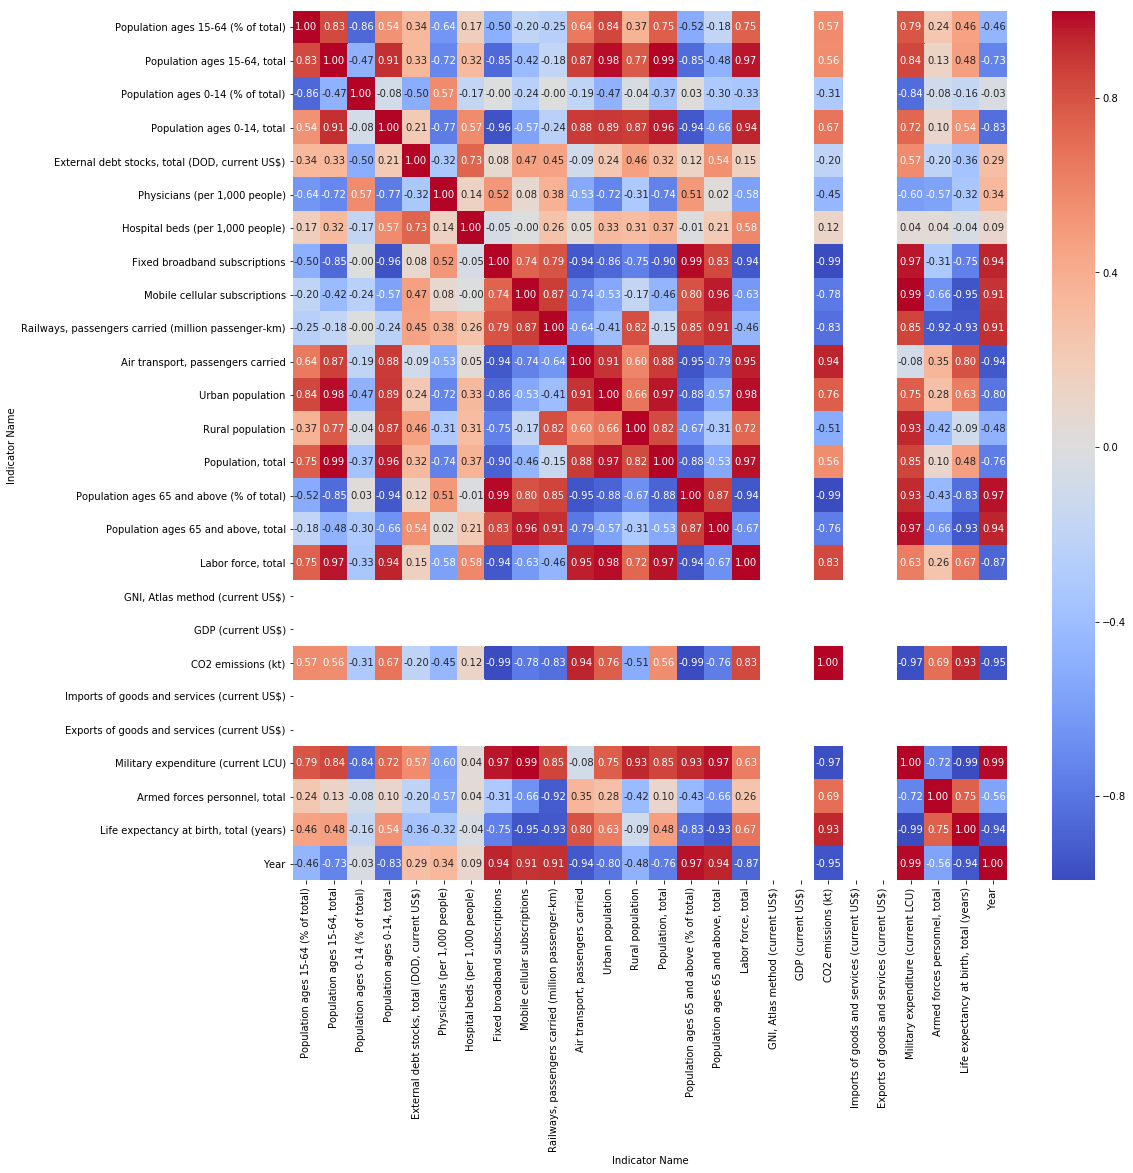

In [34]:
# Correlation heatmap
plt.figure(figsize=(16,16))
sns.heatmap(data=df_syria_00.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

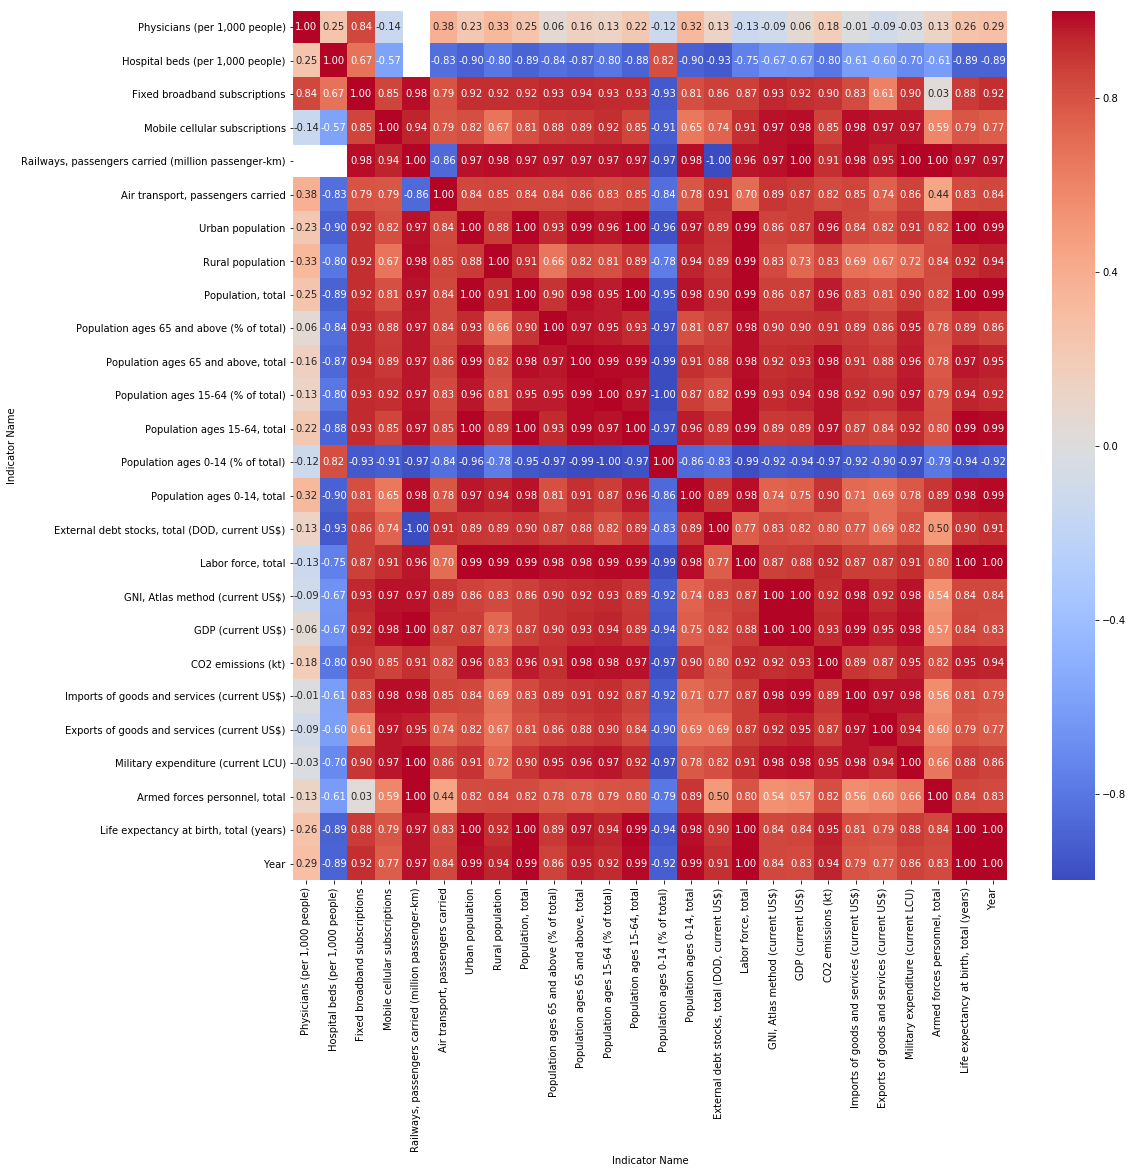

In [35]:
plt.figure(figsize=(16,16))
sns.heatmap(data=df_bolivia.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

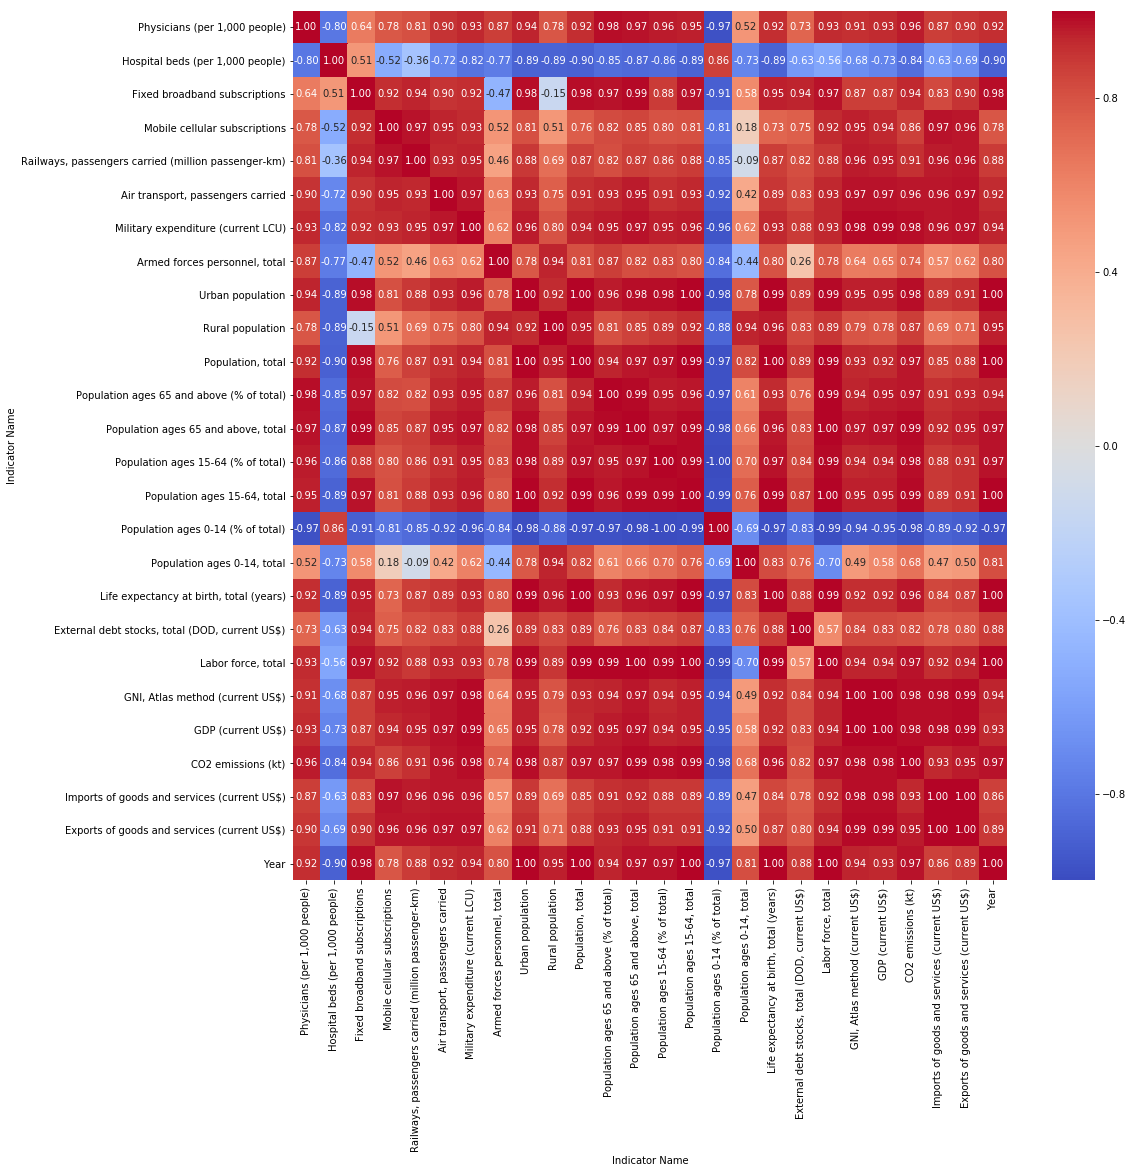

In [33]:
plt.figure(figsize=(16,16))
sns.heatmap(data=df_morocco.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [42]:
df_bolivia.to_csv('C:/Users/Usuario/Desktop/TFM/bolivia_clean.csv')
df_syria.to_csv('C:/Users/Usuario/Desktop/TFM/syria_clean.csv')
df_morocco.to_csv('C:/Users/Usuario/Desktop/TFM/morocco_clean.csv')